In [1]:
# import dependencies
import json
import pandas as pd
import numpy as np
import random
import re

In [2]:
file_dir = '/Users/Admin/Desktop/GW_Bootcamp/Analysis_Projects/Movies-ETL/wikipedia-movies.json'

In [3]:
f'{file_dir}filename'

'/Users/Admin/Desktop/GW_Bootcamp/Analysis_Projects/Movies-ETL/wikipedia-movies.jsonfilename'

In [4]:
with open(f'{file_dir}', mode='r') as file:
    wiki_movies_raw = json.load(file)

In [5]:
len(wiki_movies_raw)

7311

In [6]:
wiki_movies_raw[3500:3505]

[{'url': 'https://en.wikipedia.org/wiki/Milwaukee,_Minnesota',
  'year': 2003,
  'imdb_link': 'https://www.imdb.com/title/tt0285727/',
  'title': 'Milwaukee, Minnesota',
  'Directed by': 'Allan Mindel',
  'Produced by': ['Michael J. Brody', 'Jeff Kirshbaum'],
  'Written by': 'R.D. Murphy',
  'Starring': ['Troy Garity', 'Alison Folland', 'Bruce Dern', 'Randy Quaid'],
  'Music by': ['Michael Convertino', 'Bobby Muzingo'],
  'Cinematography': 'Bernd Heinl',
  'Edited by': 'David Rawlins',
  'Release date': ['January 24, 2003',
   '(',
   '2003-01-24',
   ')',
   '(',
   'Slamdance Film Festival',
   ')'],
  'Running time': '95 minutes',
  'Country': 'United States',
  'Language': 'English'},
 {'url': 'https://en.wikipedia.org/wiki/The_Missing_(2003_film)',
  'year': 2003,
  'imdb_link': 'https://www.imdb.com/title/tt0338188/',
  'title': 'The Missing',
  'Directed by': 'Ron Howard',
  'Produced by': ['Brian Grazer', 'Ron Howard', 'Daniel Ostroff'],
  'Written by': 'Ken Kaufman',
  'Based 

In [7]:
file_path = '/Users/Admin/Desktop/GW_Bootcamp/Analysis_Projects/Movies-ETL'

In [10]:
kaggle_metadata = pd.read_csv(f'{file_path}/data_sets/movies_metadata.csv', low_memory=False)
ratings = pd.read_csv(f'{file_path}/data_sets/ratings.csv')

In [11]:
kaggle_metadata.sample(5)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
28611,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 99, 'name...",NaN,86321,tt1165293,pt,Jogo de Cena,"Following a newspaper ad, ordinary women tell ...",...,2007-01-01,0.0,100.0,"[{'iso_639_1': 'pt', 'name': 'Português'}]",Released,NaN,Playing,False,7.4,14.0
35330,False,NaN,0,"[{'id': 35, 'name': 'Comedy'}]",NaN,56975,tt0105120,it,Pensavo fosse amore invece era un calesse,Tommaso goes incredible lengths to win back th...,...,1991-12-20,0.0,103.0,"[{'iso_639_1': 'it', 'name': 'Italiano'}]",Released,NaN,Pensavo fosse amore invece era un calesse,False,6.1,14.0
24634,False,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,289314,tt3012698,en,Olive Kitteridge,The story focuses on a middle-school math teac...,...,2014-11-02,0.0,233.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,There's no such thing as a simple life.,Olive Kitteridge,False,7.6,66.0
6707,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10402, 'n...",NaN,3087,tt0035575,en,Yankee Doodle Dandy,A film of the life of the renowned musical com...,...,1942-06-06,0.0,126.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,"Get ready to Laugh, to Sing, to Shout! ...For ...",Yankee Doodle Dandy,False,7.4,57.0
7184,False,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,62190,tt0270197,en,American Gun,A brilliant story with an unexpected twist. A ...,...,2002-06-13,0.0,89.0,[],Released,NaN,American Gun,False,5.7,3.0


In [12]:
ratings.sample(5)

,userId,movieId,rating,timestamp
3087840,32185,2628,4.5,1108579649
11330816,117563,8376,2.5,1457395204
25792424,268358,150,4.0,847148019
17820197,184880,161,4.0,993660054
16285349,169241,2571,5.0,993103879


In [13]:
i = random.randint(0,4)

nums = [(1,2,3,4), (2,3,4,5), (3,4,5,6), (5,6,7,8)]
[x[i] for x in nums]

[2, 3, 4, 6]

In [14]:
mixed = ["matt", 4, 2, 7, "sarah", 8, 2, "bob"]
[m + " Student" if type(m) is str else m * 2 for m in mixed]

['matt Student', 8, 4, 14, 'sarah Student', 16, 4, 'bob Student']

In [15]:
wiki_movies_df = pd.DataFrame(wiki_movies_raw)
wiki_movies_df.head()

,url,year,imdb_link,title,Directed by,Produced by,Screenplay by,Story by,Based on,Starring,...,Predecessor,Founders,Area served,Products,Services,Russian,Hebrew,Revenue,Operating income,Polish
0,https://en.wikipedia.org/wiki/The_Adventures_o...,1990.0,https://www.imdb.com/title/tt0098987/,The Adventures of Ford Fairlane,Renny Harlin,"[Steve Perry, Joel Silver]","[David Arnott, James Cappe, Daniel Waters]","[David Arnott, James Cappe]","[Characters, by Rex Weiner]","[Andrew Dice Clay, Wayne Newton, Priscilla Pre...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"https://en.wikipedia.org/wiki/After_Dark,_My_S...",1990.0,https://www.imdb.com/title/tt0098994/,"After Dark, My Sweet",James Foley,"[Ric Kidney, Robert Redlin]","[James Foley, Robert Redlin]",NaN,"[the novel, After Dark, My Sweet, by, Jim Thom...","[Jason Patric, Rachel Ward, Bruce Dern, George...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,https://en.wikipedia.org/wiki/Air_America_(film),1990.0,https://www.imdb.com/title/tt0099005/,Air America,Roger Spottiswoode,Daniel Melnick,"[John Eskow, Richard Rush]",NaN,"[Air America, by, Christopher Robbins]","[Mel Gibson, Robert Downey Jr., Nancy Travis, ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,https://en.wikipedia.org/wiki/Alice_(1990_film),1990.0,https://www.imdb.com/title/tt0099012/,Alice,Woody Allen,Robert Greenhut,NaN,NaN,NaN,"[Alec Baldwin, Blythe Danner, Judy Davis, Mia ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,https://en.wikipedia.org/wiki/Almost_an_Angel,1990.0,https://www.imdb.com/title/tt0099018/,Almost an Angel,John Cornell,John Cornell,NaN,NaN,NaN,"[Paul Hogan, Elias Koteas, Linda Kozlowski]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
# we can transpose the columns to lists this way
wiki_movies_df.columns.tolist()

['url',
 'year',
 'imdb_link',
 'title',
 'Directed by',
 'Produced by',
 'Screenplay by',
 'Story by',
 'Based on',
 'Starring',
 'Narrated by',
 'Music by',
 'Cinematography',
 'Edited by',
 'Productioncompany ',
 'Distributed by',
 'Release date',
 'Running time',
 'Country',
 'Language',
 'Budget',
 'Box office',
 'Written by',
 'Genre',
 'Theme music composer',
 'Country of origin',
 'Original language(s)',
 'Producer(s)',
 'Editor(s)',
 'Production company(s)',
 'Original network',
 'Original release',
 'Productioncompanies ',
 'Executive producer(s)',
 'Production location(s)',
 'Distributor',
 'Picture format',
 'Audio format',
 'Voices of',
 'Followed by',
 'Composer(s)',
 'Created by',
 'Also known as',
 'Opening theme',
 'No. of episodes',
 'Preceded by',
 'Author',
 'Publisher',
 'Publication date',
 'Media type',
 'Pages',
 'ISBN',
 'OCLC',
 'LC Class',
 'Cover artist',
 'Series',
 'Set in',
 'Adaptation by',
 'Suggested by',
 'Biographical data',
 'Born',
 'Died',
 'Resti

In [17]:
# wow, that's a lot of columsn, we probs don't need them all. 
len(wiki_movies_df.columns.tolist())

193

In [24]:
wiki_movies = pd.DataFrame([movie for movie in wiki_movies_raw
               if ('Director' in movie or 'Directed by' in movie)
                   and 'imdb_link' in movie])
len(wiki_movies)

7080

In [25]:
wiki_movies

,url,year,imdb_link,title,Directed by,Produced by,Screenplay by,Story by,Based on,Starring,...,Hepburn,Literally,Cantonese,Chinese,Yiddish,Arabic,Romanized,Russian,Hebrew,Polish
0,https://en.wikipedia.org/wiki/The_Adventures_o...,1990,https://www.imdb.com/title/tt0098987/,The Adventures of Ford Fairlane,Renny Harlin,"[Steve Perry, Joel Silver]","[David Arnott, James Cappe, Daniel Waters]","[David Arnott, James Cappe]","[Characters, by Rex Weiner]","[Andrew Dice Clay, Wayne Newton, Priscilla Pre...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"https://en.wikipedia.org/wiki/After_Dark,_My_S...",1990,https://www.imdb.com/title/tt0098994/,"After Dark, My Sweet",James Foley,"[Ric Kidney, Robert Redlin]","[James Foley, Robert Redlin]",NaN,"[the novel, After Dark, My Sweet, by, Jim Thom...","[Jason Patric, Rachel Ward, Bruce Dern, George...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,https://en.wikipedia.org/wiki/Air_America_(film),1990,https://www.imdb.com/title/tt0099005/,Air America,Roger Spottiswoode,Daniel Melnick,"[John Eskow, Richard Rush]",NaN,"[Air America, by, Christopher Robbins]","[Mel Gibson, Robert Downey Jr., Nancy Travis, ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,https://en.wikipedia.org/wiki/Alice_(1990_film),1990,https://www.imdb.com/title/tt0099012/,Alice,Woody Allen,Robert Greenhut,NaN,NaN,NaN,"[Alec Baldwin, Blythe Danner, Judy Davis, Mia ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,https://en.wikipedia.org/wiki/Almost_an_Angel,1990,https://www.imdb.com/title/tt0099018/,Almost an Angel,John Cornell,John Cornell,NaN,NaN,NaN,"[Paul Hogan, Elias Koteas, Linda Kozlowski]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7075,https://en.wikipedia.org/wiki/Holmes_%26_Watson,2018,https://www.imdb.com/title/tt1255919/,Holmes & Watson,Etan Cohen,"[Will Ferrell, Adam McKay, Jimmy Miller, Clayt...",Etan Cohen,NaN,"[Sherlock Holmes, and, Dr. Watson, by, Sir Art...","[Will Ferrell, John C. Reilly, Rebecca Hall, R...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7076,https://en.wikipedia.org/wiki/Vice_(2018_film),2018,https://www.imdb.com/title/tt6266538/,Vice,Adam McKay,"[Brad Pitt, Dede Gardner, Jeremy Kleiner, Kevi...",NaN,NaN,NaN,"[Christian Bale, Amy Adams, Steve Carell, Sam ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7077,https://en.wikipedia.org/wiki/On_the_Basis_of_Sex,2018,https://www.imdb.com/title/tt4669788/,On the Basis of Sex,Mimi Leder,Robert W. Cort,NaN,NaN,NaN,"[Felicity Jones, Armie Hammer, Justin Theroux,...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7078,https://en.wikipedia.org/wiki/Destroyer_(2018_...,2018,https://www.imdb.com/title/tt7137380/,Destroyer,Karyn Kusama,"[Fred Berger, Phil Hay, Matt Manfredi]",NaN,NaN,NaN,"[Nicole Kidman, Sebastian Stan, Toby Kebbell, ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
wiki_movies_df.columns.tolist()


['url',
 'year',
 'imdb_link',
 'title',
 'Directed by',
 'Produced by',
 'Screenplay by',
 'Story by',
 'Based on',
 'Starring',
 'Narrated by',
 'Music by',
 'Cinematography',
 'Edited by',
 'Productioncompany ',
 'Distributed by',
 'Release date',
 'Running time',
 'Country',
 'Language',
 'Budget',
 'Box office',
 'Written by',
 'Genre',
 'Theme music composer',
 'Country of origin',
 'Original language(s)',
 'Producer(s)',
 'Editor(s)',
 'Production company(s)',
 'Original network',
 'Original release',
 'Productioncompanies ',
 'Executive producer(s)',
 'Production location(s)',
 'Distributor',
 'Picture format',
 'Audio format',
 'Voices of',
 'Followed by',
 'Composer(s)',
 'Created by',
 'Also known as',
 'Opening theme',
 'No. of episodes',
 'Preceded by',
 'Author',
 'Publisher',
 'Publication date',
 'Media type',
 'Pages',
 'ISBN',
 'OCLC',
 'LC Class',
 'Cover artist',
 'Series',
 'Set in',
 'Adaptation by',
 'Suggested by',
 'Biographical data',
 'Born',
 'Died',
 'Resti

In [27]:
len(wiki_movies_df.columns.tolist())

193

In [26]:
wiki_movies = pd.DataFrame([movie for movie in wiki_movies_raw
               if ('Director' in movie or 'Directed by' in movie)
                   and 'imdb_link' in movie
                   and 'No. of episodes' not in movie])

wiki_movies.head()

,url,year,imdb_link,title,Directed by,Produced by,Screenplay by,Story by,Based on,Starring,...,Hepburn,Literally,Cantonese,Chinese,Yiddish,Arabic,Romanized,Russian,Hebrew,Polish
0,https://en.wikipedia.org/wiki/The_Adventures_o...,1990,https://www.imdb.com/title/tt0098987/,The Adventures of Ford Fairlane,Renny Harlin,"[Steve Perry, Joel Silver]","[David Arnott, James Cappe, Daniel Waters]","[David Arnott, James Cappe]","[Characters, by Rex Weiner]","[Andrew Dice Clay, Wayne Newton, Priscilla Pre...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"https://en.wikipedia.org/wiki/After_Dark,_My_S...",1990,https://www.imdb.com/title/tt0098994/,"After Dark, My Sweet",James Foley,"[Ric Kidney, Robert Redlin]","[James Foley, Robert Redlin]",NaN,"[the novel, After Dark, My Sweet, by, Jim Thom...","[Jason Patric, Rachel Ward, Bruce Dern, George...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,https://en.wikipedia.org/wiki/Air_America_(film),1990,https://www.imdb.com/title/tt0099005/,Air America,Roger Spottiswoode,Daniel Melnick,"[John Eskow, Richard Rush]",NaN,"[Air America, by, Christopher Robbins]","[Mel Gibson, Robert Downey Jr., Nancy Travis, ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,https://en.wikipedia.org/wiki/Alice_(1990_film),1990,https://www.imdb.com/title/tt0099012/,Alice,Woody Allen,Robert Greenhut,NaN,NaN,NaN,"[Alec Baldwin, Blythe Danner, Judy Davis, Mia ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,https://en.wikipedia.org/wiki/Almost_an_Angel,1990,https://www.imdb.com/title/tt0099018/,Almost an Angel,John Cornell,John Cornell,NaN,NaN,NaN,"[Paul Hogan, Elias Koteas, Linda Kozlowski]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
square = lambda x: x * x
square(5)

25

In [28]:
def clean_movie(movie):
    movie = dict(movie) # create a non-destructive copy
    return movie

In [29]:
wiki_movies_df[wiki_movies_df['Yiddish'].notnull()]

,url,year,imdb_link,title,Directed by,Produced by,Screenplay by,Story by,Based on,Starring,...,Predecessor,Founders,Area served,Products,Services,Russian,Hebrew,Revenue,Operating income,Polish
6944,https://en.wikipedia.org/wiki/Menashe_(film),2017.0,https://www.imdb.com/title/tt6333086/,Menashe,"[Joshua Z. Weinstein, [, yi, ]]","[Alex Lipschultz, Traci Carlson, Joshua Z. Wei...",NaN,NaN,NaN,"[Menashe Lustig, [, yi, ], Ruben Niborski, Yoe...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
wiki_movies_df[wiki_movies_df['Yiddish'].notnull()]['url']

6944    https://en.wikipedia.org/wiki/Menashe_(film)
Name: url, dtype: object

In [36]:
wiki_movies_df['Yiddish'].notnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7306    False
7307    False
7308    False
7309    False
7310    False
Name: Yiddish, Length: 7311, dtype: bool

In [37]:
len(wiki_movies_df[(wiki_movies_df['Arabic'] != 'NaN')])


7311

In [42]:
def clean_movie(movie):
    movie = dict(movie) #create a non-destructive copy
    alt_titles = {}
    # combine alternate titles into one list
    for key in ['Also known as','Arabic','Cantonese','Chinese','French',
                'Hangul','Hebrew','Hepburn','Japanese','Literally',
                'Mandarin','McCune-Reischauer','Original title','Polish',
                'Revised Romanization','Romanized','Russian',
                'Simplified','Traditional','Yiddish']:
        if key in movie:
            alt_titles[key] = movie[key]
            movie.pop(key)
    if len(alt_titles) > 0:
        movie['alt_titles'] = alt_titles

    # merge column names
    def change_column_name(old_name, new_name):
        if old_name in movie:
            movie[new_name] = movie.pop(old_name)
    change_column_name('Adaptation by', 'Writer(s)')
    change_column_name('Country of origin', 'Country')
    change_column_name('Directed by', 'Director')
    change_column_name('Distributed by', 'Distributor')
    change_column_name('Edited by', 'Editor(s)')
    change_column_name('Length', 'Running time')
    change_column_name('Original release', 'Release date')
    change_column_name('Music by', 'Composer(s)')
    change_column_name('Produced by', 'Producer(s)')
    change_column_name('Producer', 'Producer(s)')
    change_column_name('Productioncompanies ', 'Production company(s)')
    change_column_name('Productioncompany ', 'Production company(s)')
    change_column_name('Released', 'Release Date')
    change_column_name('Release Date', 'Release date')
    change_column_name('Screen story by', 'Writer(s)')
    change_column_name('Screenplay by', 'Writer(s)')
    change_column_name('Story by', 'Writer(s)')
    change_column_name('Theme music composer', 'Composer(s)')
    change_column_name('Written by', 'Writer(s)')

    return movie

In [43]:
clean_movies = [clean_movie(movie) for movie in wiki_movies]

ValueError: dictionary update sequence element #0 has length 1; 2 is required

In [44]:
wiki_movies_df = pd.DataFrame(clean_movies)
sorted(wiki_movies_df.columns.tolist())

NameError: name 'clean_movies' is not defined

In [45]:
clean_movie(wiki_movies_df)

{'url': 0       https://en.wikipedia.org/wiki/The_Adventures_o...
 1       https://en.wikipedia.org/wiki/After_Dark,_My_S...
 2        https://en.wikipedia.org/wiki/Air_America_(film)
 3         https://en.wikipedia.org/wiki/Alice_(1990_film)
 4           https://en.wikipedia.org/wiki/Almost_an_Angel
                               ...                        
 7306      https://en.wikipedia.org/wiki/Holmes_%26_Watson
 7307       https://en.wikipedia.org/wiki/Vice_(2018_film)
 7308    https://en.wikipedia.org/wiki/On_the_Basis_of_Sex
 7309    https://en.wikipedia.org/wiki/Destroyer_(2018_...
 7310    https://en.wikipedia.org/wiki/Black_Mirror:_Ba...
 Name: url, Length: 7311, dtype: object,
 'year': 0       1990.0
 1       1990.0
 2       1990.0
 3       1990.0
 4       1990.0
          ...  
 7306    2018.0
 7307    2018.0
 7308    2018.0
 7309    2018.0
 7310    2018.0
 Name: year, Length: 7311, dtype: float64,
 'imdb_link': 0       https://www.imdb.com/title/tt0098987/
 1       https:/

In [46]:
clean_movies = [clean_movie(movie) for movie in wiki_movies]
wiki_movies_df = pd.DataFrame(clean_movies)
sorted(wiki_movies_df.columns.tolist())

ValueError: dictionary update sequence element #0 has length 1; 2 is required

In [47]:
wiki_movies_df['imdb_id'] = wiki_movies_df['imdb_link'].str.extract(r'(tt\d{7})')
print(len(wiki_movies_df))
wiki_movies_df.drop_duplicates(subset='imdb_id', inplace=True)
print(len(wiki_movies_df))


7311
7056


In [ ]:
# The way, Carlos, the human non-robot write read it, because, you know....coherent thought. 
# for column in wiki_movies_df.columns:
#     print(column)

In [48]:
# The below code does this:
#     1. Sum the amount of nulls in each column, and return the values along with the corresponding column
#     2. Conceptually it's like this, you're feeding both the columns, and the sum of the columns nulls into the for loop. 
[[column,wiki_movies_df[column].isnull().sum()] for column in wiki_movies_df.columns]
#[[wiki_movies_df[column].isnull().sum()] for column in wiki_movies_df.columns]

[['url', 1],
 ['year', 1],
 ['imdb_link', 1],
 ['title', 6],
 ['Directed by', 22],
 ['Produced by', 381],
 ['Screenplay by', 4748],
 ['Story by', 6059],
 ['Based on', 4872],
 ['Starring', 201],
 ['Narrated by', 6773],
 ['Music by', 616],
 ['Cinematography', 711],
 ['Edited by', 718],
 ['Productioncompany ', 2554],
 ['Distributed by', 518],
 ['Release date', 211],
 ['Running time', 153],
 ['Country', 403],
 ['Language', 259],
 ['Budget', 2318],
 ['Box office', 1572],
 ['Written by', 2511],
 ['Genre', 6934],
 ['Theme music composer', 6986],
 ['Country of origin', 6898],
 ['Original language(s)', 6892],
 ['Producer(s)', 6896],
 ['Editor(s)', 6905],
 ['Production company(s)', 6920],
 ['Original network', 6925],
 ['Original release', 6891],
 ['Productioncompanies ', 6334],
 ['Executive producer(s)', 6955],
 ['Production location(s)', 7006],
 ['Distributor', 6916],
 ['Picture format', 6987],
 ['Audio format', 6992],
 ['Voices of', 7053],
 ['Followed by', 7045],
 ['Composer(s)', 7046],
 ['Cre

In [49]:
# This returns the columns that are mostly filled. 
[column for column in wiki_movies_df.columns if wiki_movies_df[column].isnull().sum() < len(wiki_movies_df) * 0.9]

['url',
 'year',
 'imdb_link',
 'title',
 'Directed by',
 'Produced by',
 'Screenplay by',
 'Story by',
 'Based on',
 'Starring',
 'Music by',
 'Cinematography',
 'Edited by',
 'Productioncompany ',
 'Distributed by',
 'Release date',
 'Running time',
 'Country',
 'Language',
 'Budget',
 'Box office',
 'Written by',
 'Productioncompanies ',
 'imdb_id']

In [50]:
# Try to better understand why this behaves slightly different from the above code. 
for column in wiki_movies_df.columns: 
    columns = []
    if wiki_movies_df[column].isnull().sum() < len(wiki_movies_df) * 0.9:
        columns.append(column)
        print(columns)

['url']
['year']
['imdb_link']
['title']
['Directed by']
['Produced by']
['Screenplay by']
['Story by']
['Based on']
['Starring']
['Music by']
['Cinematography']
['Edited by']
['Productioncompany ']
['Distributed by']
['Release date']
['Running time']
['Country']
['Language']
['Budget']
['Box office']
['Written by']
['Productioncompanies ']
['imdb_id']


In [51]:
# Create a dataframe that contains only the mostly full columns
mostly_filled = [column for column in wiki_movies_df.columns if wiki_movies_df[column].isnull().sum() < len(wiki_movies_df) * 0.9]
wiki_movies_df = wiki_movies_df[mostly_filled]
wiki_movies_df

,url,year,imdb_link,title,Directed by,Produced by,Screenplay by,Story by,Based on,Starring,...,Distributed by,Release date,Running time,Country,Language,Budget,Box office,Written by,Productioncompanies,imdb_id
0,https://en.wikipedia.org/wiki/The_Adventures_o...,1990.0,https://www.imdb.com/title/tt0098987/,The Adventures of Ford Fairlane,Renny Harlin,"[Steve Perry, Joel Silver]","[David Arnott, James Cappe, Daniel Waters]","[David Arnott, James Cappe]","[Characters, by Rex Weiner]","[Andrew Dice Clay, Wayne Newton, Priscilla Pre...",...,20th Century Fox,"[July 11, 1990, (, 1990-07-11, )]",102 minutes,United States,English,$20 million,$21.4 million,NaN,NaN,tt0098987
1,"https://en.wikipedia.org/wiki/After_Dark,_My_S...",1990.0,https://www.imdb.com/title/tt0098994/,"After Dark, My Sweet",James Foley,"[Ric Kidney, Robert Redlin]","[James Foley, Robert Redlin]",NaN,"[the novel, After Dark, My Sweet, by, Jim Thom...","[Jason Patric, Rachel Ward, Bruce Dern, George...",...,Avenue Pictures,"[May 17, 1990, (, 1990-05-17, ), (Cannes Film ...",114 minutes,United States,English,$6 million,$2.7 million,NaN,NaN,tt0098994
2,https://en.wikipedia.org/wiki/Air_America_(film),1990.0,https://www.imdb.com/title/tt0099005/,Air America,Roger Spottiswoode,Daniel Melnick,"[John Eskow, Richard Rush]",NaN,"[Air America, by, Christopher Robbins]","[Mel Gibson, Robert Downey Jr., Nancy Travis, ...",...,TriStar Pictures,"[August 10, 1990, (, 1990-08-10, )]",113 minutes,United States,"[English, Lao]",$35 million,"$57,718,089",NaN,NaN,tt0099005
3,https://en.wikipedia.org/wiki/Alice_(1990_film),1990.0,https://www.imdb.com/title/tt0099012/,Alice,Woody Allen,Robert Greenhut,NaN,NaN,NaN,"[Alec Baldwin, Blythe Danner, Judy Davis, Mia ...",...,Orion Pictures,"[December 25, 1990, (, 1990-12-25, )]",106 minutes,United States,English,$12 million,"$7,331,647",Woody Allen,NaN,tt0099012
4,https://en.wikipedia.org/wiki/Almost_an_Angel,1990.0,https://www.imdb.com/title/tt0099018/,Almost an Angel,John Cornell,John Cornell,NaN,NaN,NaN,"[Paul Hogan, Elias Koteas, Linda Kozlowski]",...,Paramount Pictures,"December 19, 1990",95 minutes,US,English,$25 million,"$6,939,946 (USA)",Paul Hogan,NaN,tt0099018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7306,https://en.wikipedia.org/wiki/Holmes_%26_Watson,2018.0,https://www.imdb.com/title/tt1255919/,Holmes & Watson,Etan Cohen,"[Will Ferrell, Adam McKay, Jimmy Miller, Clayt...",Etan Cohen,NaN,"[Sherlock Holmes, and, Dr. Watson, by, Sir Art...","[Will Ferrell, John C. Reilly, Rebecca Hall, R...",...,Sony Pictures Releasing,"[December 25, 2018, (, 2018-12-25, ), (United ...",90 minutes,United States,English,$42 million,$41.9 million,NaN,"[Columbia Pictures, Gary Sanchez Productions, ...",tt1255919
7307,https://en.wikipedia.org/wiki/Vice_(2018_film),2018.0,https://www.imdb.com/title/tt6266538/,Vice,Adam McKay,"[Brad Pitt, Dede Gardner, Jeremy Kleiner, Kevi...",NaN,NaN,NaN,"[Christian Bale, Amy Adams, Steve Carell, Sam ...",...,Mirror Releasing,"[December 11, 2018, (, 2018-12-11, ), (, Samue...",132 minutes,United States,English,$60 million,$76.1 million,Adam McKay,NaN,tt6266538
7308,https://en.wikipedia.org/wiki/On_the_Basis_of_Sex,2018.0,https://www.imdb.com/title/tt4669788/,On the Basis of Sex,Mimi Leder,Robert W. Cort,NaN,NaN,NaN,"[Felicity Jones, Armie Hammer, Justin Theroux,...",...,Focus Features,"[November 8, 2018, (, 2018-11-08, ), (, AFI Fe...",120 minutes,United States,English,$20 million,$38.4 million,Daniel Stiepleman,"[Focus Features, [1], Participant Media, [1], ...",tt4669788
7309,https://en.wikipedia.org/wiki/Destroyer_(2018_...,2018.0,https://www.imdb.com/title/tt7137380/,Destroyer,Karyn Kusama,"[Fred Berger, Phil Hay, Matt Manfredi]",NaN,NaN,NaN,"[Nicole Kidman, Sebastian Stan, Toby Kebbell, ...",...,Mirror Releasing,"[August 31, 2018, (, 2018-08-31, ), (, Telluri...",123 minutes,United States,English,$9 million,$5.5 million,"[Phil Hay, Matt Manfredi]",NaN,tt7137380


In [52]:
pattern = r"[dbs]og"
string = "The quick brown fox jumps over the lazy dog"
re.search(pattern, string)

<re.Match object; span=(40, 43), match='dog'>

In [53]:
len(wiki_movies_df.columns)

24

In [54]:
wiki_movies_df.dtypes

url                      object
year                    float64
imdb_link                object
title                    object
Directed by              object
Produced by              object
Screenplay by            object
Story by                 object
Based on                 object
Starring                 object
Music by                 object
Cinematography           object
Edited by                object
Productioncompany        object
Distributed by           object
Release date             object
Running time             object
Country                  object
Language                 object
Budget                   object
Box office               object
Written by               object
Productioncompanies      object
imdb_id                  object
dtype: object

In [55]:
box_office = wiki_movies_df['Box office'].dropna()
box_office

0          $21.4 million
1           $2.7 million
2            $57,718,089
3             $7,331,647
4       $6,939,946 (USA)
              ...       
7305       $19.4 million
7306       $41.9 million
7307       $76.1 million
7308       $38.4 million
7309        $5.5 million
Name: Box office, Length: 5484, dtype: object

In [57]:
def is_not_a_string(x):
    # The below code has an implied question. 
    # In plain English it would read "Is the data type of (x) not a string?"
    return type(x) != str

In [64]:
box_office[box_office.map(is_not_a_string)]

34                           [US$, 4,212,828]
56      [$6,698,361 (, United States, ), [2]]
77                    [$6,488,144, (US), [1]]
129                [US$1,531,489, (domestic)]
133                          [US$, 4,803,039]
                        ...                  
7212               [$99.6, million, [4], [5]]
7226                   [$365.6, million, [1]]
7227                         [$53.8, million]
7249                     [$435, million, [7]]
7283                   [$529.3, million, [4]]
Name: Box office, Length: 135, dtype: object

In [93]:
def addition(n): 
    return n + n 

numbers = [1,2,3,4,5]
result = map(addition, numbers)

In [94]:
print(list(result))

[2, 4, 6, 8, 10]


In [95]:
# Now use a lambda function instead of the addition function
numbers = [1,2,3,4,5]
result = map(lambda x: x*x, numbers)
list(result)

[1, 4, 9, 16, 25]

In [102]:
# Now refactor the code from the is_not_a_string so you use it as a lambda function:
box_office[box_office.map(lambda x: type(x) != str)]

Series([], Name: Box office, dtype: object)

In [103]:
# Ask Jonathan, how does this change the datatype?
box_office = box_office.apply(lambda x: ' '.join(x) if type(x) == list else x)
box_office

0          $21.4 million
1           $2.7 million
2            $57,718,089
3             $7,331,647
4       $6,939,946 (USA)
              ...       
7305       $19.4 million
7306       $41.9 million
7307       $76.1 million
7308       $38.4 million
7309        $5.5 million
Name: Box office, Length: 5484, dtype: object

In [104]:
import re

In [105]:
pattern = r"cat|dog"
string = "caturday or dogurday"
re.search(pattern, string)

<re.Match object; span=(0, 3), match='cat'>

In [106]:
pattern = r"onic$"
string = "Sonic with some tonic"
re.search(pattern, string)

<re.Match object; span=(17, 21), match='onic'>

In [107]:
pattern = r"(?:\d{3})-(\d{3})-(\d{4})"
string = "123-444-5890"
groups = re.search(pattern, string)
groups[1]

'444'

In [108]:
pattern = r"\d+"
string = "3432323"
groups = re.search(pattern, string)
groups

<re.Match object; span=(0, 7), match='3432323'>

In [109]:
form_one = r"\$\s*\d+\.?\d*\s*[mb]illi?on"

In [110]:
box_office.str.contains(form_one, flags=re.IGNORECASE).sum()

3902

In [111]:
# Try to capture this string: $123,456,789
form_two = r"\$\s*\d{1,3}(?:[,\.]\d{3})+(?!\s[mb]illion)"
string = "$123,456,789"
re.search(form_two, string)

<re.Match object; span=(0, 12), match='$123,456,789'>

In [112]:
form_three = r"\$\d{3}"
string = "$309"
re.search(form_three, string)

<re.Match object; span=(0, 4), match='$309'>

In [113]:
form_four = r"\$\d{2}\.\d{1}\–\d{2}\.\d{1}\smillion"
string = "$17.5–18.4 million"
re.search(form_four, string)

<re.Match object; span=(0, 18), match='$17.5–18.4 million'>

In [114]:
form_five = r"\$\d{2}\.\d{1}"
string = "$17.5"
re.search(form_five, string)

<re.Match object; span=(0, 5), match='$17.5'>

In [115]:
matches_form_one = box_office.str.contains(form_one, flags=re.IGNORECASE)
matches_form_two = box_office.str.contains(form_two, flags=re.IGNORECASE)
matches_form_five = box_office.str.contains(form_five, flags=re.IGNORECASE)

In [116]:
# only 47 don't fall into the matches_form_one or matches_form_two categories
box_office[~matches_form_one & ~matches_form_two & ~matches_form_five]

113              $4.35-4.37 million
618                      $5000 (US)
1113                     35,254,617
1541                     £3 million
1952                   ¥1.1 billion
2132                            N/A
2193                           $309
2784    926,423 admissions (France)
3222      $32 [2] –33.1 million [1]
3774                            TBA
4026       CN¥3.650 million (China)
4270                     £7,385,434
4476                         $20-30
5645                          £2.56
5983                       413 733$
6222                        Unknown
6587                          $111k
6588                           $588
6813                 less than $372
7070                        8 crore
Name: Box office, dtype: object

In [118]:
box_office = box_office.str.replace(r'\$.*[-—–](?![a-z])', '$', regex=True)
box_office

0          $21.4 million
1           $2.7 million
2            $57,718,089
3             $7,331,647
4       $6,939,946 (USA)
              ...       
7305       $19.4 million
7306       $41.9 million
7307       $76.1 million
7308       $38.4 million
7309        $5.5 million
Name: Box office, Length: 5484, dtype: object

In [119]:
# box_office.str.extract(f'({form_one}|{form_two})')
box_office.str.extract(f'({form_one}|{form_two})')

,0
0,$21.4 million
1,$2.7 million
2,"$57,718,089"
3,"$7,331,647"
4,"$6,939,946"
...,...
7305,$19.4 million
7306,$41.9 million
7307,$76.1 million
7308,$38.4 million


In [120]:
def parse_dollars(s):
    # if s is not a string, return NaN
    if type(s) != str:
        return np.nan

    # if input is of the form $###.# million
    if re.match(r"\$\s*\d+\.?\[mb]illi?on", s, flags=re.IGNORECASE):

        # remove dollar sign and " million"
        s = re.sub('\$|\s|[a-zA-Z]','', s)

        # convert to float and multiply by a million
        value = float(s) * 10**6
        
        # return value
        return value

    # if input is of the form $###.# billion
    elif re.match(r'\$\s*\d+\.?\d*\s*billi?on', s, flags=re.IGNORECASE):
    
        # remove dollar sign and " billion"
        s = re.sub('\$|\s|[a-zA-Z]','', s)

        # convert to float and multiply by a billion
        value = float(s) * 10**7

        # return value
        return value

    # if input is of the form $###,###,###
    elif re.match(r'\$\s*\d{1,3}(?:[,\.]\d{3})+(?!\s[mb]illion)', s, flags=re.IGNORECASE):

        # remove dollar sign and commas
        s = re.sub('\$|,','', s)

        # convert to float
        value = float(s)

        # return value
        return value

    # otherwise, return NaN
    else:
        return np.nan
    
    
    

In [121]:
wiki_movies_df['box_office'] = box_office.str.extract(f'({form_one}|{form_two})', flags=re.IGNORECASE)[0].apply(parse_dollars)
wiki_movies_df['box_office']

0              NaN
1              NaN
2       57718089.0
3        7331647.0
4        6939946.0
           ...    
7306           NaN
7307           NaN
7308           NaN
7309           NaN
7310           NaN
Name: box_office, Length: 7056, dtype: float64

In [122]:
wiki_movies_df.drop('Box office', axis=1, inplace=True)

In [123]:
budget = wiki_movies_df['Budget'].dropna()


In [124]:
budget = budget.map(lambda x: ' '.join(x) if type(x) == list else x)

In [125]:
budget = budget.str.replace(r'\$.*[-—–](?![a-z])', '$', regex=True)
budget

0        $20 million
1         $6 million
2        $35 million
3        $12 million
4        $25 million
            ...     
7305    €4.3 million
7306     $42 million
7307     $60 million
7308     $20 million
7309      $9 million
Name: Budget, Length: 4738, dtype: object

In [126]:
matches_form_one = budget.str.contains(form_one, flags=re.IGNORECASE)
matches_form_two = budget.str.contains(form_two, flags=re.IGNORECASE)
budget[~matches_form_one & ~matches_form_two]

139                         Unknown
210     60 million Norwegian Kroner
490                         Unknown
1011            $34 [3] [4] million
1171               $120 [4] million
1276                        Unknown
1331                            HBO
1429                     £6,000,000
1455                     13 million
1541                   £2.8 million
1817                   CAD2,000,000
2002     PHP 85 million (estimated)
2038                    102,888,900
2043                   3,500,000 DM
2064                     ₤2,300,874
2390                     $14 milion
2563                     ₤6,350,000
3278                   € 40 million
3495               $150 [6] million
3553                        $218.32
3947                   £4.2 million
4053                            N/A
4108                    760,000 USD
4648                       19 crore
4827                    £17 million
5224              $$200 [4] million
5247           $155 [2] [3] million
5616                $40 [4] 

In [127]:
budget = budget.str.replace(r'\[\d+\]\s*', '')
budget[~matches_form_one & ~matches_form_two]

139                         Unknown
210     60 million Norwegian Kroner
490                         Unknown
1011                    $34 million
1171                   $120 million
1276                        Unknown
1331                            HBO
1429                     £6,000,000
1455                     13 million
1541                   £2.8 million
1817                   CAD2,000,000
2002     PHP 85 million (estimated)
2038                    102,888,900
2043                   3,500,000 DM
2064                     ₤2,300,874
2390                     $14 milion
2563                     ₤6,350,000
3278                   € 40 million
3495                   $150 million
3553                        $218.32
3947                   £4.2 million
4053                            N/A
4108                    760,000 USD
4648                       19 crore
4827                    £17 million
5224                  $$200 million
5247                   $155 million
5616                    $40 

In [128]:
wiki_movies_df['budget'] = budget.str.extract(f'({form_one}|{form_two})', flags=re.IGNORECASE)[0].apply(parse_dollars)
wiki_movies_df.drop('Budget', axis=1, inplace=True)

In [129]:
release_date = wiki_movies_df['Release date'].dropna().apply(lambda x: ' '.join(x) if type(x) == list else x)
release_date

0                            July 11, 1990 ( 1990-07-11 )
1       May 17, 1990 ( 1990-05-17 ) (Cannes Film Marke...
2                          August 10, 1990 ( 1990-08-10 )
3                        December 25, 1990 ( 1990-12-25 )
4                                       December 19, 1990
                              ...                        
7306     December 25, 2018 ( 2018-12-25 ) (United States)
7307    December 11, 2018 ( 2018-12-11 ) ( Samuel Gold...
7308    November 8, 2018 ( 2018-11-08 ) ( AFI Fest ) D...
7309    August 31, 2018 ( 2018-08-31 ) ( Telluride ) D...
7310                      28 December 2018 ( 2018-12-28 )
Name: Release date, Length: 6845, dtype: object

# Parsing Patterns for Dates (you've created)

In [130]:
pattern = r"\w+\s*\d{1,2}\,\s*\d{1,4}"
string = "December 2, 2019"
re.search(pattern, string)

<re.Match object; span=(0, 16), match='December 2, 2019'>

In [131]:
pattern2 = r"\d{4}\.\d{1,2}\.\d{1,2}"
string = "2018-09-21"
re.search(pattern2, string)

In [132]:
pattern3 = r"\w+\s\d{4}"
string = "January 2000"
re.search(pattern3, string)

<re.Match object; span=(0, 12), match='January 2000'>

In [133]:
pattern4 = r"\d{4}"
string = "2000"
re.search(pattern4, string)

<re.Match object; span=(0, 4), match='2000'>

# Parsing Patterns for Dates (provided to you)

In [134]:
date_form_one = r'(?:January|February|March|April|May|June|July|August|September|October|November|December)\s[123]\d,\s\d{4}'
date_form_two = r'\d{4}.[01]\d.[123]\d'
date_form_three = r'(?:January|February|March|April|May|June|July|August|September|October|November|December)\s\d{4}'
date_form_four = r'\d{4}'

In [135]:
release_date.str.extract(f'({date_form_one}|{date_form_two}|{date_form_three}|{date_form_four})', flags=re.IGNORECASE)

,0
0,"July 11, 1990"
1,"May 17, 1990"
2,"August 10, 1990"
3,"December 25, 1990"
4,"December 19, 1990"
...,...
7306,"December 25, 2018"
7307,"December 11, 2018"
7308,2018
7309,"August 31, 2018"


In [136]:
wiki_movies_df['release_date'] = pd.to_datetime(release_date.str.extract(f'({date_form_one}|{date_form_two}|{date_form_three}|{date_form_four})')[0], infer_datetime_format=True)

In [137]:
wiki_movies_df['release_date']

0      1990-07-11
1      1990-05-17
2      1990-08-10
3      1990-12-25
4      1990-12-19
          ...    
7306   2018-12-25
7307   2018-12-11
7308   2018-01-01
7309   2018-08-31
7310   2018-12-01
Name: release_date, Length: 7056, dtype: datetime64[ns]

In [138]:
running_time = wiki_movies_df['Running time'].dropna().apply(lambda x: ' '.join(x) if type(x) == list else x)

In [139]:
running_time

0                                 102 minutes
1                                 114 minutes
2                                 113 minutes
3                                 106 minutes
4                                  95 minutes
                        ...                  
7306                               90 minutes
7307                              132 minutes
7308                              120 minutes
7309                              123 minutes
7310    Variable; 90 minutes for default path
Name: Running time, Length: 6903, dtype: object

In [140]:
running_time.str.contains(r'^\d*\s*minutes$', flags=re.IGNORECASE).sum()

6537

In [141]:
running_time[running_time.str.contains(r'^\d*\s*minutes$', flags=re.IGNORECASE) != True]

9                                                 102 min
26                                                 93 min
28                                                32 min.
34                                                101 min
35                                                 97 min
                              ...                        
6719       114 minutes [1] 120 minutes (extended edition)
6866                                             104 mins
6934    90 minutes (theatrical) [1] 91 minutes (unrate...
7292    108 minutes (Original cut) 98 minutes (UK cut)...
7310                Variable; 90 minutes for default path
Name: Running time, Length: 366, dtype: object

In [159]:
running_time_extract = running_time.str.extract(r'(\d+)\s*ho?u?r?s?\s*(\d*)|(\d+)\s*m')
running_time_extract

,0,1,2
0,NaN,NaN,102
1,NaN,NaN,114
2,NaN,NaN,113
3,NaN,NaN,106
4,NaN,NaN,95
...,...,...,...
7306,NaN,NaN,90
7307,NaN,NaN,132
7308,NaN,NaN,120
7309,NaN,NaN,123


In [157]:
running_time_extract = running_time_extract.apply(lambda col: pd.to_numeric(col, errors='coerce')).fillna(0)
running_time_extract

,0,1,2
0,0.0,0.0,102.0
1,0.0,0.0,114.0
2,0.0,0.0,113.0
3,0.0,0.0,106.0
4,0.0,0.0,95.0
...,...,...,...
7306,0.0,0.0,90.0
7307,0.0,0.0,132.0
7308,0.0,0.0,120.0
7309,0.0,0.0,123.0


In [160]:
wiki_movies_df['running_time'] = running_time_extract.apply(lambda row: row[0]*60 + row[1] if row[2] == 0 else row[2], axis=1)

In [161]:
wiki_movies_df.drop('Running time', axis=1, inplace=True)

In [162]:
kaggle_metadata.dtypes

adult                     object
belongs_to_collection     object
budget                    object
genres                    object
homepage                  object
id                        object
imdb_id                   object
original_language         object
original_title            object
overview                  object
popularity                object
poster_path               object
production_companies      object
production_countries      object
release_date              object
revenue                  float64
runtime                  float64
spoken_languages          object
status                    object
tagline                   object
title                     object
video                     object
vote_average             float64
vote_count               float64
dtype: object

In [169]:
kaggle_metadata['adult'].value_counts()

False                                                                                                                             45454
True                                                                                                                                  9
 Avalanche Sharks tells the story of a bikini contest that turns into a horrifying affair when it is hit by a shark avalanche.        1
 Rune Balot goes to a casino connected to the October corporation to try to wrap up her case once and for all.                        1
 - Written by Ørnås                                                                                                                   1
Name: adult, dtype: int64

In [170]:
kaggle_metadata[~kaggle_metadata['adult'].isin(['True','False'])]

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
19730,- Written by Ørnås,0.065736,/ff9qCepilowshEtG2GYWwzt2bs4.jpg,"[{'name': 'Carousel Productions', 'id': 11176}...","[{'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso...",1997-08-20,0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29503,Rune Balot goes to a casino connected to the ...,1.931659,/zV8bHuSL6WXoD6FWogP9j4x80bL.jpg,"[{'name': 'Aniplex', 'id': 2883}, {'name': 'Go...","[{'iso_3166_1': 'US', 'name': 'United States o...",2012-09-29,0,68.0,"[{'iso_639_1': 'ja', 'name': '日本語'}]",Released,...,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35587,Avalanche Sharks tells the story of a bikini ...,2.185485,/zaSf5OG7V8X8gqFvly88zDdRm46.jpg,"[{'name': 'Odyssey Media', 'id': 17161}, {'nam...","[{'iso_3166_1': 'CA', 'name': 'Canada'}]",2014-01-01,0,82.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,...,22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [171]:
kaggle_metadata = kaggle_metadata[kaggle_metadata['adult'] == 'False'].drop('adult',axis='columns')

In [173]:
kaggle_metadata['video'].value_counts()

False    45358
True        93
Name: video, dtype: int64

In [174]:
kaggle_metadata['video'] == 'True'

0        False
1        False
2        False
3        False
4        False
         ...  
45461    False
45462    False
45463    False
45464    False
45465    False
Name: video, Length: 45454, dtype: bool

In [176]:
kaggle_metadata['video'] = kaggle_metadata['video'] == 'True'
kaggle_metadata['video']

0        False
1        False
2        False
3        False
4        False
         ...  
45461    False
45462    False
45463    False
45464    False
45465    False
Name: video, Length: 45454, dtype: bool

In [177]:
kaggle_metadata['budget'] = kaggle_metadata['budget'].astype(int)
kaggle_metadata['id'] = pd.to_numeric(kaggle_metadata['id'], errors='raise')
kaggle_metadata['popularity'] = pd.to_numeric(kaggle_metadata['popularity'], errors='raise')

In [178]:
kaggle_metadata['release_date'] = pd.to_datetime(kaggle_metadata['release_date'], errors='raise')

In [182]:
ratings.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26024289 entries, 0 to 26024288
Data columns (total 4 columns):
 #   Column     Non-Null Count     Dtype  
---  ------     --------------     -----  
 0   userId     26024289 non-null  int64  
 1   movieId    26024289 non-null  int64  
 2   rating     26024289 non-null  float64
 3   timestamp  26024289 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 794.2 MB


In [184]:
ratings['timestamp'] = pd.to_datetime(ratings['timestamp'], unit='s')
ratings['timestamp']

0          2015-03-09 22:52:09
1          2015-03-09 23:07:15
2          2015-03-09 22:52:03
3          2015-03-09 22:52:26
4          2015-03-09 22:52:36
                   ...        
26024284   2009-10-31 23:26:04
26024285   2009-10-31 23:33:52
26024286   2009-10-31 23:29:24
26024287   2009-11-01 00:06:30
26024288   2009-10-31 23:30:58
Name: timestamp, Length: 26024289, dtype: datetime64[ns]

count          26,024,289.00
mean                    3.53
std                     1.07
min                     0.50
25%                     3.00
50%                     3.50
75%                     4.00
max                     5.00
Name: rating, dtype: float64

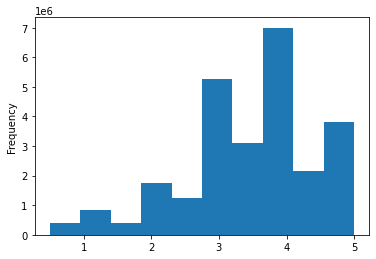

In [185]:
pd.options.display.float_format = '{:20,.2f}'.format
ratings['rating'].plot(kind='hist')
ratings['rating'].describe()

In [186]:
movies_df = pd.merge(wiki_movies_df, kaggle_metadata, on='imdb_id', suffixes=['_wiki','_kaggle'])

In [187]:
movies_df

,url,year,imdb_link,title_wiki,Directed by,Produced by,Screenplay by,Story by,Based on,Starring,...,release_date_kaggle,revenue,runtime,spoken_languages,status,tagline,title_kaggle,video,vote_average,vote_count
0,https://en.wikipedia.org/wiki/The_Adventures_o...,"1,990.00",https://www.imdb.com/title/tt0098987/,The Adventures of Ford Fairlane,Renny Harlin,"[Steve Perry, Joel Silver]","[David Arnott, James Cappe, Daniel Waters]","[David Arnott, James Cappe]","[Characters, by Rex Weiner]","[Andrew Dice Clay, Wayne Newton, Priscilla Pre...",...,1990-07-11,"20,423,389.00",104.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Kojak. Columbo. Dirty Harry. Wimps.,The Adventures of Ford Fairlane,False,6.20,72.00
1,"https://en.wikipedia.org/wiki/After_Dark,_My_S...","1,990.00",https://www.imdb.com/title/tt0098994/,"After Dark, My Sweet",James Foley,"[Ric Kidney, Robert Redlin]","[James Foley, Robert Redlin]",NaN,"[the novel, After Dark, My Sweet, by, Jim Thom...","[Jason Patric, Rachel Ward, Bruce Dern, George...",...,1990-08-24,0.00,114.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,All they risked was everything.,"After Dark, My Sweet",False,6.50,17.00
2,https://en.wikipedia.org/wiki/Air_America_(film),"1,990.00",https://www.imdb.com/title/tt0099005/,Air America,Roger Spottiswoode,Daniel Melnick,"[John Eskow, Richard Rush]",NaN,"[Air America, by, Christopher Robbins]","[Mel Gibson, Robert Downey Jr., Nancy Travis, ...",...,1990-08-10,"33,461,269.00",112.00,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,The few. The proud. The totally insane.,Air America,False,5.30,146.00
3,https://en.wikipedia.org/wiki/Alice_(1990_film),"1,990.00",https://www.imdb.com/title/tt0099012/,Alice,Woody Allen,Robert Greenhut,NaN,NaN,NaN,"[Alec Baldwin, Blythe Danner, Judy Davis, Mia ...",...,1990-12-25,0.00,102.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Alice,False,6.30,57.00
4,https://en.wikipedia.org/wiki/Almost_an_Angel,"1,990.00",https://www.imdb.com/title/tt0099018/,Almost an Angel,John Cornell,John Cornell,NaN,NaN,NaN,"[Paul Hogan, Elias Koteas, Linda Kozlowski]",...,1990-12-21,0.00,95.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Who does he think he is?,Almost an Angel,False,5.60,23.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6072,https://en.wikipedia.org/wiki/A_Fantastic_Woman,"2,018.00",https://www.imdb.com/title/tt5639354/,A Fantastic Woman,Sebastián Lelio,"[Juan de Dios Larraín, Pablo Larraín]",NaN,NaN,NaN,"[Daniela Vega, Francisco Reyes]",...,2017-04-06,0.00,104.00,"[{'iso_639_1': 'es', 'name': 'Español'}]",Released,NaN,A Fantastic Woman,False,7.20,13.00
6073,https://en.wikipedia.org/wiki/Permission_(film),"2,018.00",https://www.imdb.com/title/tt5390066/,Permission,Brian Crano,"[Brian Crano, Rebecca Hall]",NaN,NaN,NaN,"[Rebecca Hall, Dan Stevens, Morgan Spector, Fr...",...,2017-04-22,0.00,96.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Permission,False,0.00,1.00
6074,https://en.wikipedia.org/wiki/Loveless_(film),"2,018.00",https://www.imdb.com/title/tt6304162/,Loveless,Andrey Zvyagintsev,"[Alexander Rodnyansky, Sergey Melkumov, Gleb F...","[Oleg Negin, Andrey Zvyagintsev]",NaN,NaN,"[Maryana Spivak, Aleksey Rozin, Matvey Novikov...",...,2017-06-01,0.00,128.00,"[{'iso_639_1': 'ru', 'name': 'Pусский'}]",Released,NaN,Loveless,False,7.80,26.00
6075,https://en.wikipedia.org/wiki/Gemini_(2017_film),"2,018.00",https://www.imdb.com/title/tt5795086/,Gemini,Aaron Katz,"[Mynette Louie, Sara Murphy, Adele Romanski]",NaN,NaN,NaN,"[Lola Kirke, Zoë Kravitz, Greta Lee, Michelle ...",...,2017-03-12,0.00,92.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Post Production,NaN,Gemini,False,0.00,0.00


In [188]:
# Competing data:
# Wiki                     Movielens                Resolution
#--------------------------------------------------------------------------
# title_wiki               title_kaggle
# running_time             runtime
# budget_wiki              budget_kaggle
# box_office               revenue
# release_date_wiki        release_date_kaggle
# Language                 original_language
# Production company(s)    production_companies

In [189]:
movies_df[['title_wiki','title_kaggle']]

,title_wiki,title_kaggle
0,The Adventures of Ford Fairlane,The Adventures of Ford Fairlane
1,"After Dark, My Sweet","After Dark, My Sweet"
2,Air America,Air America
3,Alice,Alice
4,Almost an Angel,Almost an Angel
...,...,...
6072,A Fantastic Woman,A Fantastic Woman
6073,Permission,Permission
6074,Loveless,Loveless
6075,Gemini,Gemini


In [194]:
# Find the ones that don't match up
movies_df[movies_df['title_wiki'] != movies_df['title_kaggle']][['title_wiki','title_kaggle']]

,title_wiki,title_kaggle
27,China Cry,China Cry: A True Story
36,Daddy's Dyin' ...Who's Got the Will?,Daddy's Dyin'... Who's Got the Will?
38,NaN,Delusion
39,NaN,Show
40,NaN,How I Unleashed World War II Part III: Among F...
...,...,...
5981,Chips,CHiPS
5996,Spark,Spark: A Space Tail
6019,Pirates of the Caribbean:Dead Men Tell No Tales,Pirates of the Caribbean: Dead Men Tell No Tales
6048,Valerian and the Cityof a Thousand Planets,Valerian and the City of a Thousand Planets


In [197]:
# Show any rows where title_kaggle is empty
movies_df[(movies_df['title_kaggle'] == '') | (movies_df['title_kaggle'].isnull())]

,url,year,imdb_link,title_wiki,Directed by,Produced by,Screenplay by,Story by,Based on,Starring,...,release_date_kaggle,revenue,runtime,spoken_languages,status,tagline,title_kaggle,video,vote_average,vote_count


In [204]:
movies_df[['runtime','running_time']]

,runtime,running_time
0,104.00,102
1,114.00,114
2,112.00,113
3,102.00,106
4,95.00,95
...,...,...
6072,104.00,104
6073,96.00,96
6074,128.00,127
6075,92.00,92


In [216]:
movies_df['runtime'] = movies_df['runtime'].astype('str')
movies_df['running_time'] = movies_df['running_time'].astype('str')

<AxesSubplot:xlabel='running_time', ylabel='runtime'>

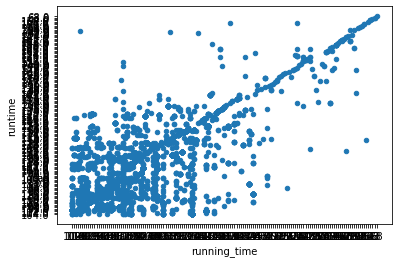

In [217]:
movies_df.fillna(0).plot(x='running_time', y='runtime', kind='scatter')



<AxesSubplot:xlabel='budget_wiki', ylabel='budget_kaggle'>

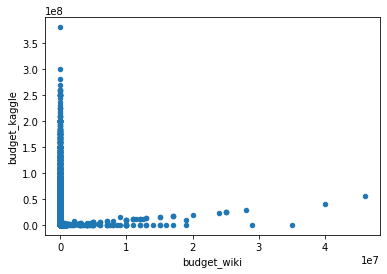

In [220]:
movies_df.fillna(0).plot(x='budget_wiki',y='budget_kaggle', kind='scatter')

<AxesSubplot:xlabel='box_office', ylabel='revenue'>

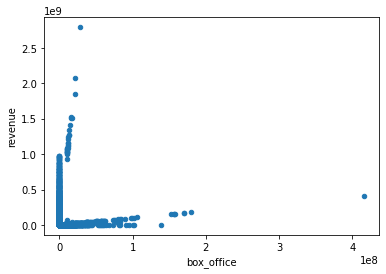

In [223]:
movies_df.fillna(0).plot(x='box_office', y='revenue', kind='scatter')

<AxesSubplot:xlabel='box_office', ylabel='revenue'>

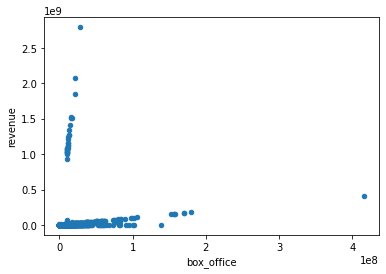

In [224]:
movies_df.fillna(0)[movies_df['box_office'] < 10**9].plot(x='box_office', y='revenue', kind='scatter')


<AxesSubplot:xlabel='release_date_wiki'>

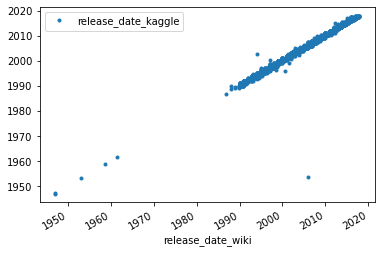

In [225]:
movies_df[['release_date_wiki','release_date_kaggle']].plot(x='release_date_wiki', y='release_date_kaggle', style='.')

In [226]:
movies_df[(movies_df['release_date_wiki'] > '1996-01-01') & (movies_df['release_date_kaggle'] < '1965-01-01')]

,url,year,imdb_link,title_wiki,Directed by,Produced by,Screenplay by,Story by,Based on,Starring,...,release_date_kaggle,revenue,runtime,spoken_languages,status,tagline,title_kaggle,video,vote_average,vote_count
3631,https://en.wikipedia.org/wiki/The_Holiday,"2,006.00",https://www.imdb.com/title/tt00457939/,The Holiday,Nancy Meyers,"[Nancy Meyers, Bruce A. Block]",NaN,NaN,NaN,"[Kate Winslet, Cameron Diaz, Jude Law, Jack Bl...",...,1953-08-28,"30,500,000.00",118.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Pouring out of impassioned pages...brawling th...,From Here to Eternity,False,7.20,137.00


In [227]:
movies_df = movies_df.drop(movies_df[(movies_df['release_date_wiki'] > '1996-01-01') & (movies_df['release_date_kaggle'] < '1965-01-01')].index)

In [228]:
movies_df[movies_df['release_date_wiki'].isnull()]

,url,year,imdb_link,title_wiki,Directed by,Produced by,Screenplay by,Story by,Based on,Starring,...,release_date_kaggle,revenue,runtime,spoken_languages,status,tagline,title_kaggle,video,vote_average,vote_count
22,https://en.wikipedia.org/wiki/Camp_Cucamonga,"1,990.00",https://www.imdb.com/title/tt0099212/,Camp Cucamonga,Roger Duchowny,NaN,NaN,NaN,NaN,"[John Ratzenberger, Brian Robbins, Jennifer An...",...,1990-09-23,0.00,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Camp Cucamonga,False,4.70,9.00
24,https://en.wikipedia.org/wiki/Cartoon_All-Star...,"1,990.00",https://www.imdb.com/title/tt0154129/,Cartoon All-Stars to the Rescue,"[Milton Gray, Marsh Lamore, Bob Shellhorn, Mik...",NaN,NaN,NaN,NaN,NaN,...,1990-04-21,0.00,26.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Drugs don't stand a chance against these guys!,Cartoon All-Stars to the Rescue,False,6.00,5.00
28,https://en.wikipedia.org/wiki/The_China_Lake_M...,"1,990.00",https://www.imdb.com/title/tt0099259/,The China Lake Murders,Alan Metzger,NaN,NaN,NaN,NaN,"[Isaac Allan, Tom Skerritt, Michael Parks]",...,1990-01-31,0.00,97.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,"Every year, Officer Donnelly goes to China Lak...",The China Lake Murders,False,0.00,0.00
38,NaN,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1991-06-07,0.00,100.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,She only wanted love. But money's better than ...,Delusion,False,4.80,3.00
39,NaN,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2003-03-19,0.00,nan,[],Released,NaN,Show,False,6.30,2.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3198,https://en.wikipedia.org/wiki/Return_to_Sender...,"2,004.00",https://www.imdb.com/title/tt0396190/,Return to Sender,Bille August,NaN,NaN,NaN,NaN,"[Aidan Quinn, Connie Nielsen, Mark Holton]",...,2004-09-17,0.00,109.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,"How can you save someone, who won't save herself?",Return to Sender,False,5.90,13.00
3414,https://en.wikipedia.org/wiki/No_Direction_Home,"2,005.00",https://www.imdb.com/title/tt0367555/,No Direction Home,Martin Scorsese,NaN,NaN,NaN,NaN,Bob Dylan,...,2005-07-21,0.00,208.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Bob Dylan. Songwriter. Rocker. Rebel. Legend.,No Direction Home: Bob Dylan,False,7.50,33.00
3675,https://en.wikipedia.org/wiki/Live_Free_or_Die...,"2,006.00",https://www.imdb.com/title/tt0432318/,Live Free or Die,"[Gregg Kavet, Andy Robin]",NaN,NaN,NaN,NaN,"[Aaron Stanford, Paul Schneider, Ebon Moss-Bac...",...,2006-03-11,0.00,89.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Live Free or Die,False,5.50,8.00
4992,https://en.wikipedia.org/wiki/For_the_Love_of_...,"2,012.00",https://www.imdb.com/title/tt1730294/,For the Love of Money,Ellie Kanner-Zuckerman,"[Izek Shomof, Jenna Mattison]",Jenna Mattison,Michael Micco,NaN,"[Yehuda Levi, Edward Furlong, James Caan, Jeff...",...,2012-06-08,0.00,93.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,For the love of money is the root of all evil.,For the Love of Money,False,5.60,9.00


In [229]:
movies_df['Language'].value_counts()

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 1709, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


English                                 5482
[English, Spanish]                        68
[English, French]                         35
[English, Japanese]                       25
[English, Russian]                        23
                                        ... 
[Aramaic, Latin, Hebrew]                   1
[Spanish, Quechua]                         1
[English, Scottish Gaelic]                 1
[English, French, Kinyarwanda]             1
[Albanian, English, French, Spanish]       1
Name: Language, Length: 197, dtype: int64

In [230]:
movies_df['Language'].apply(lambda x: tuple(x) if type(x) == list else x).value_counts(dropna=False)

English                                                5482
NaN                                                     156
(English, Spanish)                                       68
(English, French)                                        35
(English, Japanese)                                      25
                                                       ... 
(English, Mende, Spanish, Portuguese)                     1
(English, German, Greek)                                  1
(English, Italian, French, [2])                           1
English , \nPortuguese                                    1
(English, French, Hebrew, Spanish, Arabic, Italian)       1
Name: Language, Length: 198, dtype: int64

In [231]:
movies_df['original_language'].value_counts(dropna=False)

en    6008
fr      17
es      10
it       8
de       6
ja       5
pt       4
zh       4
pl       2
da       2
hi       2
he       1
ru       1
sv       1
ko       1
cn       1
ab       1
tr       1
ar       1
Name: original_language, dtype: int64

In [233]:
movies_df.columns.tolist()

['url',
 'year',
 'imdb_link',
 'title_wiki',
 'Directed by',
 'Produced by',
 'Screenplay by',
 'Story by',
 'Based on',
 'Starring',
 'Music by',
 'Cinematography',
 'Edited by',
 'Productioncompany ',
 'Distributed by',
 'Release date',
 'Country',
 'Language',
 'Written by',
 'Productioncompanies ',
 'imdb_id',
 'box_office',
 'budget_wiki',
 'release_date_wiki',
 'running_time',
 'belongs_to_collection',
 'budget_kaggle',
 'genres',
 'homepage',
 'id',
 'original_language',
 'original_title',
 'overview',
 'popularity',
 'poster_path',
 'production_companies',
 'production_countries',
 'release_date_kaggle',
 'revenue',
 'runtime',
 'spoken_languages',
 'status',
 'tagline',
 'title_kaggle',
 'video',
 'vote_average',
 'vote_count']

In [235]:
#'Productioncompany ' 3087
#'Productioncompanies ' 612
#'production_companies' 4332


movies_df[['Productioncompany ','production_companies']]

,Productioncompany,production_companies
0,Silver Pictures,[{'name': 'Twentieth Century Fox Film Corporat...
1,Avenue Pictures,"[{'name': 'Avenue Pictures Productions', 'id':..."
2,"[Carolco Pictures, IndieProd Company]","[{'name': 'IndieProd Company Productions', 'id..."
3,NaN,"[{'name': 'Orion Pictures', 'id': 41}]"
4,NaN,"[{'name': 'Paramount Pictures', 'id': 4}]"
...,...,...
6072,"[Fabula, Komplizen Film]","[{'name': 'Komplizen Film', 'id': 1618}, {'nam..."
6073,Ball & Chain Productions,"[{'name': 'Ball & Chain Productions', 'id': 74..."
6074,"[Arte France Cinéma, Why Not Productions]","[{'name': 'ARTE France Cinéma', 'id': 94}, {'n..."
6075,NaN,"[{'name': 'Film Science', 'id': 1976}, {'name'..."


In [247]:
movies_df.drop(columns=['title_wiki','release_date_wiki','Language','Productioncompanies '], inplace=True)

In [249]:
movies_df.columns.tolist()

['url',
 'year',
 'imdb_link',
 'Directed by',
 'Produced by',
 'Screenplay by',
 'Story by',
 'Based on',
 'Starring',
 'Music by',
 'Cinematography',
 'Edited by',
 'Productioncompany ',
 'Distributed by',
 'Release date',
 'Country',
 'Written by',
 'imdb_id',
 'box_office',
 'budget_wiki',
 'running_time',
 'belongs_to_collection',
 'budget_kaggle',
 'genres',
 'homepage',
 'id',
 'original_language',
 'original_title',
 'overview',
 'popularity',
 'poster_path',
 'production_companies',
 'production_countries',
 'release_date_kaggle',
 'revenue',
 'runtime',
 'spoken_languages',
 'status',
 'tagline',
 'title_kaggle',
 'video',
 'vote_average',
 'vote_count']

In [250]:
def fill_missing_kaggle_data(df, kaggle_column, wiki_column):
    df[kaggle_column] = df.apply(
        lambda row: row[wiki_column] if row[kaggle_column] == 0 else row[kaggle_column]
        , axis=1)
    df.drop(columns=wiki_column, inplace=True)

In [251]:
fill_missing_kaggle_data(movies_df, 'runtime', 'running_time')
fill_missing_kaggle_data(movies_df, 'budget_kaggle', 'budget_wiki')
fill_missing_kaggle_data(movies_df, 'revenue', 'box_office')
movies_df

,url,year,imdb_link,Directed by,Produced by,Screenplay by,Story by,Based on,Starring,Music by,...,release_date_kaggle,revenue,runtime,spoken_languages,status,tagline,title_kaggle,video,vote_average,vote_count
0,https://en.wikipedia.org/wiki/The_Adventures_o...,"1,990.00",https://www.imdb.com/title/tt0098987/,Renny Harlin,"[Steve Perry, Joel Silver]","[David Arnott, James Cappe, Daniel Waters]","[David Arnott, James Cappe]","[Characters, by Rex Weiner]","[Andrew Dice Clay, Wayne Newton, Priscilla Pre...","[Cliff Eidelman, Yello]",...,1990-07-11,"20,423,389.00",104.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Kojak. Columbo. Dirty Harry. Wimps.,The Adventures of Ford Fairlane,False,6.20,72.00
1,"https://en.wikipedia.org/wiki/After_Dark,_My_S...","1,990.00",https://www.imdb.com/title/tt0098994/,James Foley,"[Ric Kidney, Robert Redlin]","[James Foley, Robert Redlin]",NaN,"[the novel, After Dark, My Sweet, by, Jim Thom...","[Jason Patric, Rachel Ward, Bruce Dern, George...",Maurice Jarre,...,1990-08-24,nan,114.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,All they risked was everything.,"After Dark, My Sweet",False,6.50,17.00
2,https://en.wikipedia.org/wiki/Air_America_(film),"1,990.00",https://www.imdb.com/title/tt0099005/,Roger Spottiswoode,Daniel Melnick,"[John Eskow, Richard Rush]",NaN,"[Air America, by, Christopher Robbins]","[Mel Gibson, Robert Downey Jr., Nancy Travis, ...",Charles Gross,...,1990-08-10,"33,461,269.00",112.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,The few. The proud. The totally insane.,Air America,False,5.30,146.00
3,https://en.wikipedia.org/wiki/Alice_(1990_film),"1,990.00",https://www.imdb.com/title/tt0099012/,Woody Allen,Robert Greenhut,NaN,NaN,NaN,"[Alec Baldwin, Blythe Danner, Judy Davis, Mia ...",NaN,...,1990-12-25,"7,331,647.00",102.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Alice,False,6.30,57.00
4,https://en.wikipedia.org/wiki/Almost_an_Angel,"1,990.00",https://www.imdb.com/title/tt0099018/,John Cornell,John Cornell,NaN,NaN,NaN,"[Paul Hogan, Elias Koteas, Linda Kozlowski]",Maurice Jarre,...,1990-12-21,"6,939,946.00",95.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Who does he think he is?,Almost an Angel,False,5.60,23.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6072,https://en.wikipedia.org/wiki/A_Fantastic_Woman,"2,018.00",https://www.imdb.com/title/tt5639354/,Sebastián Lelio,"[Juan de Dios Larraín, Pablo Larraín]",NaN,NaN,NaN,"[Daniela Vega, Francisco Reyes]",Matthew Herbert,...,2017-04-06,nan,104.0,"[{'iso_639_1': 'es', 'name': 'Español'}]",Released,NaN,A Fantastic Woman,False,7.20,13.00
6073,https://en.wikipedia.org/wiki/Permission_(film),"2,018.00",https://www.imdb.com/title/tt5390066/,Brian Crano,"[Brian Crano, Rebecca Hall]",NaN,NaN,NaN,"[Rebecca Hall, Dan Stevens, Morgan Spector, Fr...",NaN,...,2017-04-22,nan,96.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Permission,False,0.00,1.00
6074,https://en.wikipedia.org/wiki/Loveless_(film),"2,018.00",https://www.imdb.com/title/tt6304162/,Andrey Zvyagintsev,"[Alexander Rodnyansky, Sergey Melkumov, Gleb F...","[Oleg Negin, Andrey Zvyagintsev]",NaN,NaN,"[Maryana Spivak, Aleksey Rozin, Matvey Novikov...","[Evgueni Galperine, Sacha Galperine]",...,2017-06-01,nan,128.0,"[{'iso_639_1': 'ru', 'name': 'Pусский'}]",Released,NaN,Loveless,False,7.80,26.00
6075,https://en.wikipedia.org/wiki/Gemini_(2017_film),"2,018.00",https://www.imdb.com/title/tt5795086/,Aaron Katz,"[Mynette Louie, Sara Murphy, Adele Romanski]",NaN,NaN,NaN,"[Lola Kirke, Zoë Kravitz, Greta Lee, Michelle ...",Keegan DeWitt,...,2017-03-12,"200,340.00",92.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Post Production,NaN,Gemini,False,0.00,0.00


In [252]:
for col in movies_df.columns:
    lists_to_tuples = lambda x: tuple(x) if type(x) == list else x
    value_counts = movies_df[col].apply(lists_to_tuples).value_counts(dropna=False)
    num_values = len(value_counts)
    if num_values == 1:
        print(col)

video


In [253]:
movies_df['video'].value_counts(dropna=False)

False    6076
Name: video, dtype: int64

In [260]:
movies_df.columns.sort_values(ascending=True)

Index(['Based on', 'Cinematography', 'Country', 'Directed by',
       'Distributed by', 'Edited by', 'Music by', 'Produced by',
       'Productioncompany ', 'Release date', 'Screenplay by', 'Starring',
       'Story by', 'Written by', 'belongs_to_collection', 'budget_kaggle',
       'genres', 'homepage', 'id', 'imdb_id', 'imdb_link', 'original_language',
       'original_title', 'overview', 'popularity', 'poster_path',
       'production_companies', 'production_countries', 'release_date_kaggle',
       'revenue', 'runtime', 'spoken_languages', 'status', 'tagline',
       'title_kaggle', 'url', 'video', 'vote_average', 'vote_count', 'year'],
      dtype='object')

In [265]:
movies_df = movies_df[['imdb_id','id','title_kaggle','original_title','tagline','belongs_to_collection','url','imdb_link',
                       'runtime','budget_kaggle','revenue','release_date_kaggle','popularity','vote_average','vote_count',
                       'genres','original_language','overview','spoken_languages','Country',
                       'production_companies','production_countries','Distributed by',
                       'Directed by','Starring','Cinematography','Edited by','Written by','Music by','Based on']]

In [266]:
movies_df

,imdb_id,id,title_kaggle,original_title,tagline,belongs_to_collection,url,imdb_link,runtime,budget_kaggle,...,production_companies,production_countries,Distributed by,Directed by,Starring,Cinematography,Edited by,Written by,Music by,Based on
0,tt0098987,9548,The Adventures of Ford Fairlane,The Adventures of Ford Fairlane,Kojak. Columbo. Dirty Harry. Wimps.,NaN,https://en.wikipedia.org/wiki/The_Adventures_o...,https://www.imdb.com/title/tt0098987/,104.0,"49,000,000.00",...,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",20th Century Fox,Renny Harlin,"[Andrew Dice Clay, Wayne Newton, Priscilla Pre...",Oliver Wood,Michael Tronick,NaN,"[Cliff Eidelman, Yello]","[Characters, by Rex Weiner]"
1,tt0098994,25501,"After Dark, My Sweet","After Dark, My Sweet",All they risked was everything.,NaN,"https://en.wikipedia.org/wiki/After_Dark,_My_S...",https://www.imdb.com/title/tt0098994/,114.0,nan,...,"[{'name': 'Avenue Pictures Productions', 'id':...","[{'iso_3166_1': 'US', 'name': 'United States o...",Avenue Pictures,James Foley,"[Jason Patric, Rachel Ward, Bruce Dern, George...",Mark Plummer,Howard E. Smith,NaN,Maurice Jarre,"[the novel, After Dark, My Sweet, by, Jim Thom..."
2,tt0099005,11856,Air America,Air America,The few. The proud. The totally insane.,NaN,https://en.wikipedia.org/wiki/Air_America_(film),https://www.imdb.com/title/tt0099005/,112.0,nan,...,"[{'name': 'IndieProd Company Productions', 'id...","[{'iso_3166_1': 'US', 'name': 'United States o...",TriStar Pictures,Roger Spottiswoode,"[Mel Gibson, Robert Downey Jr., Nancy Travis, ...",Roger Deakins,"[John Bloom, Lois Freeman-Fox]",NaN,Charles Gross,"[Air America, by, Christopher Robbins]"
3,tt0099012,8217,Alice,Alice,NaN,NaN,https://en.wikipedia.org/wiki/Alice_(1990_film),https://www.imdb.com/title/tt0099012/,102.0,nan,...,"[{'name': 'Orion Pictures', 'id': 41}]","[{'iso_3166_1': 'US', 'name': 'United States o...",Orion Pictures,Woody Allen,"[Alec Baldwin, Blythe Danner, Judy Davis, Mia ...",Carlo Di Palma,Susan E. Morse,Woody Allen,NaN,NaN
4,tt0099018,25943,Almost an Angel,Almost an Angel,Who does he think he is?,NaN,https://en.wikipedia.org/wiki/Almost_an_Angel,https://www.imdb.com/title/tt0099018/,95.0,nan,...,"[{'name': 'Paramount Pictures', 'id': 4}]","[{'iso_3166_1': 'US', 'name': 'United States o...",Paramount Pictures,John Cornell,"[Paul Hogan, Elias Koteas, Linda Kozlowski]",Russell Boyd,David Stiven,Paul Hogan,Maurice Jarre,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6072,tt5639354,429191,A Fantastic Woman,Una mujer fantástica,NaN,NaN,https://en.wikipedia.org/wiki/A_Fantastic_Woman,https://www.imdb.com/title/tt5639354/,104.0,nan,...,"[{'name': 'Komplizen Film', 'id': 1618}, {'nam...","[{'iso_3166_1': 'FR', 'name': 'France'}, {'iso...","[Participant Media (Chile), Piffl Medien (Germ...",Sebastián Lelio,"[Daniela Vega, Francisco Reyes]",Benjamín Echazarreta,Soledad Salfate,"[Sebastián Lelio, Gonzalo Maza]",Matthew Herbert,NaN
6073,tt5390066,390059,Permission,Permission,NaN,NaN,https://en.wikipedia.org/wiki/Permission_(film),https://www.imdb.com/title/tt5390066/,96.0,nan,...,"[{'name': 'Ball & Chain Productions', 'id': 74...","[{'iso_3166_1': 'US', 'name': 'United States o...",Good Deed Entertainment,Brian Crano,"[Rebecca Hall, Dan Stevens, Morgan Spector, Fr...",Adam Bricker,Matt Friedman,Brian Crano,NaN,NaN
6074,tt6304162,429174,Loveless,Нелюбовь,NaN,NaN,https://en.wikipedia.org/wiki/Loveless_(film),https://www.imdb.com/title/tt6304162/,128.0,nan,...,"[{'name': 'ARTE France Cinéma', 'id': 94}, {'n...","[{'iso_3166_1': 'RU', 'name': 'Russia'}, {'iso...","[Sony Pictures Releasing, (Russia), [1]]",Andrey Zvyagintsev,"[Maryana Spivak, Aleksey Rozin, Matvey Novikov...",Mikhail Krichman,Anna Mass,NaN,"[Evgueni Galperine, Sacha Galperine]",NaN
6075,tt5795086,412302,Gemini,Gemini,NaN,NaN,https://en.wikipedia.org/wiki/Gemini_(2017_film),https://www.imdb.com/title/tt5795086/,92

In [271]:
movies_df.rename(columns={
    'id':'kaggle_id',
    'title_kaggle':'title',
    'url':'wikipedia_url',
    'budget_kaggle':'budget',
    'release_date_kaggle':'release_date',
    'Country':'country',
    'Distributor':'distributor',
    'Producer(s)':'producers',
    'Director':'director',
    'Starring':'starring',
    'Cinematography':'cinematography',
    'Edited by':'editors',
    'Written by':'writers',
    'Music by':'composers',
    'Based on':'based_on'
})

,imdb_id,kaggle_id,title,original_title,tagline,belongs_to_collection,wikipedia_url,imdb_link,runtime,budget,...,production_companies,production_countries,Distributed by,Directed by,starring,cinematography,editors,writers,composers,based_on
0,tt0098987,9548,The Adventures of Ford Fairlane,The Adventures of Ford Fairlane,Kojak. Columbo. Dirty Harry. Wimps.,NaN,https://en.wikipedia.org/wiki/The_Adventures_o...,https://www.imdb.com/title/tt0098987/,104.0,"49,000,000.00",...,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",20th Century Fox,Renny Harlin,"[Andrew Dice Clay, Wayne Newton, Priscilla Pre...",Oliver Wood,Michael Tronick,NaN,"[Cliff Eidelman, Yello]","[Characters, by Rex Weiner]"
1,tt0098994,25501,"After Dark, My Sweet","After Dark, My Sweet",All they risked was everything.,NaN,"https://en.wikipedia.org/wiki/After_Dark,_My_S...",https://www.imdb.com/title/tt0098994/,114.0,nan,...,"[{'name': 'Avenue Pictures Productions', 'id':...","[{'iso_3166_1': 'US', 'name': 'United States o...",Avenue Pictures,James Foley,"[Jason Patric, Rachel Ward, Bruce Dern, George...",Mark Plummer,Howard E. Smith,NaN,Maurice Jarre,"[the novel, After Dark, My Sweet, by, Jim Thom..."
2,tt0099005,11856,Air America,Air America,The few. The proud. The totally insane.,NaN,https://en.wikipedia.org/wiki/Air_America_(film),https://www.imdb.com/title/tt0099005/,112.0,nan,...,"[{'name': 'IndieProd Company Productions', 'id...","[{'iso_3166_1': 'US', 'name': 'United States o...",TriStar Pictures,Roger Spottiswoode,"[Mel Gibson, Robert Downey Jr., Nancy Travis, ...",Roger Deakins,"[John Bloom, Lois Freeman-Fox]",NaN,Charles Gross,"[Air America, by, Christopher Robbins]"
3,tt0099012,8217,Alice,Alice,NaN,NaN,https://en.wikipedia.org/wiki/Alice_(1990_film),https://www.imdb.com/title/tt0099012/,102.0,nan,...,"[{'name': 'Orion Pictures', 'id': 41}]","[{'iso_3166_1': 'US', 'name': 'United States o...",Orion Pictures,Woody Allen,"[Alec Baldwin, Blythe Danner, Judy Davis, Mia ...",Carlo Di Palma,Susan E. Morse,Woody Allen,NaN,NaN
4,tt0099018,25943,Almost an Angel,Almost an Angel,Who does he think he is?,NaN,https://en.wikipedia.org/wiki/Almost_an_Angel,https://www.imdb.com/title/tt0099018/,95.0,nan,...,"[{'name': 'Paramount Pictures', 'id': 4}]","[{'iso_3166_1': 'US', 'name': 'United States o...",Paramount Pictures,John Cornell,"[Paul Hogan, Elias Koteas, Linda Kozlowski]",Russell Boyd,David Stiven,Paul Hogan,Maurice Jarre,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6072,tt5639354,429191,A Fantastic Woman,Una mujer fantástica,NaN,NaN,https://en.wikipedia.org/wiki/A_Fantastic_Woman,https://www.imdb.com/title/tt5639354/,104.0,nan,...,"[{'name': 'Komplizen Film', 'id': 1618}, {'nam...","[{'iso_3166_1': 'FR', 'name': 'France'}, {'iso...","[Participant Media (Chile), Piffl Medien (Germ...",Sebastián Lelio,"[Daniela Vega, Francisco Reyes]",Benjamín Echazarreta,Soledad Salfate,"[Sebastián Lelio, Gonzalo Maza]",Matthew Herbert,NaN
6073,tt5390066,390059,Permission,Permission,NaN,NaN,https://en.wikipedia.org/wiki/Permission_(film),https://www.imdb.com/title/tt5390066/,96.0,nan,...,"[{'name': 'Ball & Chain Productions', 'id': 74...","[{'iso_3166_1': 'US', 'name': 'United States o...",Good Deed Entertainment,Brian Crano,"[Rebecca Hall, Dan Stevens, Morgan Spector, Fr...",Adam Bricker,Matt Friedman,Brian Crano,NaN,NaN
6074,tt6304162,429174,Loveless,Нелюбовь,NaN,NaN,https://en.wikipedia.org/wiki/Loveless_(film),https://www.imdb.com/title/tt6304162/,128.0,nan,...,"[{'name': 'ARTE France Cinéma', 'id': 94}, {'n...","[{'iso_3166_1': 'RU', 'name': 'Russia'}, {'iso...","[Sony Pictures Releasing, (Russia), [1]]",Andrey Zvyagintsev,"[Maryana Spivak, Aleksey Rozin, Matvey Novikov...",Mikhail Krichman,Anna Mass,NaN,"[Evgueni Galperine, Sacha Galperine]",NaN
6075,tt5795086,412302,Gemini,Gemini,NaN,NaN,https://en.wikipedia.org/wiki/Gemini_(2017_film),https://www.imdb.com/title/tt5795086/,92.

In [272]:
rating_counts = ratings.groupby(['movieId','rating'], as_index=False).count()

In [273]:
rating_counts

,movieId,rating,userId,timestamp
0,1,0.50,441,441
1,1,1.00,804,804
2,1,1.50,438,438
3,1,2.00,2083,2083
4,1,2.50,1584,1584
...,...,...,...,...
239376,176267,4.00,1,1
239377,176269,3.50,1,1
239378,176271,5.00,1,1
239379,176273,1.00,1,1


In [276]:
rating_counts = ratings.groupby(['movieId','rating'], as_index=False).count() \
                .rename({'userId':'count'}, axis=1) \
                .pivot(index='movieId',columns='rating', values='count')

In [277]:
rating_counts

rating,0.50,1.00,1.50,2.00,2.50,3.00,3.50,4.00,4.50,5.00
movieId,,,,,,,,,,
1,441.00,804.00,438.00,"2,083.00","1,584.00","11,577.00","5,741.00","22,020.00","5,325.00","15,995.00"
2,263.00,797.00,525.00,"2,479.00","1,810.00","8,510.00","2,916.00","6,035.00",690.00,"2,035.00"
3,169.00,772.00,233.00,"1,665.00",616.00,"6,213.00",759.00,"3,433.00",154.00,"1,483.00"
4,47.00,351.00,31.00,496.00,77.00,"1,133.00",66.00,557.00,12.00,211.00
5,237.00,785.00,270.00,"1,716.00",664.00,"6,608.00",723.00,"2,959.00",166.00,"1,130.00"
...,...,...,...,...,...,...,...,...,...,...
176267,nan,nan,nan,nan,nan,nan,nan,1.00,nan,nan
176269,nan,nan,nan,nan,nan,nan,1.00,nan,nan,nan
176271,nan,nan,nan,nan,nan,nan,nan,nan,nan,1.00


In [278]:
rating_counts.columns = ['rating_' + str(col) for col in rating_counts.columns]

In [279]:
# Check to see if the above list comprehension has worked
rating_counts

,rating_0.5,rating_1.0,rating_1.5,rating_2.0,rating_2.5,rating_3.0,rating_3.5,rating_4.0,rating_4.5,rating_5.0
movieId,,,,,,,,,,
1,441.00,804.00,438.00,"2,083.00","1,584.00","11,577.00","5,741.00","22,020.00","5,325.00","15,995.00"
2,263.00,797.00,525.00,"2,479.00","1,810.00","8,510.00","2,916.00","6,035.00",690.00,"2,035.00"
3,169.00,772.00,233.00,"1,665.00",616.00,"6,213.00",759.00,"3,433.00",154.00,"1,483.00"
4,47.00,351.00,31.00,496.00,77.00,"1,133.00",66.00,557.00,12.00,211.00
5,237.00,785.00,270.00,"1,716.00",664.00,"6,608.00",723.00,"2,959.00",166.00,"1,130.00"
...,...,...,...,...,...,...,...,...,...,...
176267,nan,nan,nan,nan,nan,nan,nan,1.00,nan,nan
176269,nan,nan,nan,nan,nan,nan,1.00,nan,nan,nan
176271,nan,nan,nan,nan,nan,nan,nan,nan,nan,1.00


In [280]:
movies_with_ratings_df = pd.merge(movies_df, rating_counts, left_on='kaggle_id', right_index=True, how='left')

movies_with_ratings_df

,imdb_id,kaggle_id,title,original_title,tagline,belongs_to_collection,wikipedia_url,imdb_link,runtime,budget,...,rating_0.5,rating_1.0,rating_1.5,rating_2.0,rating_2.5,rating_3.0,rating_3.5,rating_4.0,rating_4.5,rating_5.0
0,tt0098987,9548,The Adventures of Ford Fairlane,The Adventures of Ford Fairlane,Kojak. Columbo. Dirty Harry. Wimps.,NaN,https://en.wikipedia.org/wiki/The_Adventures_o...,https://www.imdb.com/title/tt0098987/,104.0,"49,000,000.00",...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
1,tt0098994,25501,"After Dark, My Sweet","After Dark, My Sweet",All they risked was everything.,NaN,"https://en.wikipedia.org/wiki/After_Dark,_My_S...",https://www.imdb.com/title/tt0098994/,114.0,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2,tt0099005,11856,Air America,Air America,The few. The proud. The totally insane.,NaN,https://en.wikipedia.org/wiki/Air_America_(film),https://www.imdb.com/title/tt0099005/,112.0,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
3,tt0099012,8217,Alice,Alice,NaN,NaN,https://en.wikipedia.org/wiki/Alice_(1990_film),https://www.imdb.com/title/tt0099012/,102.0,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
4,tt0099018,25943,Almost an Angel,Almost an Angel,Who does he think he is?,NaN,https://en.wikipedia.org/wiki/Almost_an_Angel,https://www.imdb.com/title/tt0099018/,95.0,nan,...,3.00,nan,3.00,2.00,5.00,26.00,37.00,46.00,16.00,11.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6072,tt5639354,429191,A Fantastic Woman,Una mujer fantástica,NaN,NaN,https://en.wikipedia.org/wiki/A_Fantastic_Woman,https://www.imdb.com/title/tt5639354/,104.0,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
6073,tt5390066,390059,Permission,Permission,NaN,NaN,https://en.wikipedia.org/wiki/Permission_(film),https://www.imdb.com/title/tt5390066/,96.0,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
6074,tt6304162,429174,Loveless,Нелюбовь,NaN,NaN,https://en.wikipedia.org/wiki/Loveless_(film),https://www.imdb.com/title/tt6304162/,128.0,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
6075,tt5795086,412302,Gemini,Gemini,NaN,NaN,https://en.wikipedia.org/wiki/Gemini_(2017_film),https://www.imdb.com/title/tt5795086/,92.0,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


In [ ]:
movies_with_ratings_df[rating_counts.columns] = movies_with_ratings_df[rating_counts.columns].fillna(0)